In [23]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot
from image_loader import val_train_split

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict
from model_helpers import plot_train_history

# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [50]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
test_df = pd.read_csv('../datasets/test_animals/test_labels.csv')

In [51]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])
test_df.Label = pd.Categorical(pd.factorize(test_df.Label)[0])


In [52]:
df_lab.shape

(2850, 2)

In [53]:
test_df.shape

(150, 2)

In [54]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'
test_data_dir = '../datasets/test_animals/'

In [55]:
# Create Train & Validation split

train_df, val_df = val_train_split(df_lab, 0.2)

Train Shape: (2280, 2)
Validation Shape: (570, 2)


In [56]:
train_df

,FilePath,Label
0,dogs/dogs_00062.jpg,1
1,cats/cats_00670.jpg,0
2,panda/panda_00827.jpg,2
3,panda/panda_00363.jpg,2
4,cats/cats_00861.jpg,0
...,...,...
2275,dogs/dogs_00758.jpg,1
2276,dogs/dogs_00215.jpg,1
2277,dogs/dogs_00250.jpg,1
2278,dogs/dogs_00414.jpg,1


In [57]:
val_df

,FilePath,Label
0,dogs/dogs_00697.jpg,1
1,cats/cats_00396.jpg,0
2,panda/panda_00240.jpg,2
3,dogs/dogs_00937.jpg,1
4,panda/panda_00328.jpg,2
...,...,...
565,cats/cats_00235.jpg,0
566,panda/panda_00524.jpg,2
567,cats/cats_00324.jpg,0
568,dogs/dogs_00903.jpg,1


In [58]:
test_df

,FilePath,Label
0,cat/cats_00001.jpg,0
1,cat/cats_00002.jpg,0
2,cat/cats_00003.jpg,0
3,cat/cats_00004.jpg,0
4,cat/cats_00005.jpg,0
...,...,...
145,panda/panda_00027.jpg,2
146,panda/panda_00028.jpg,2
147,panda/panda_00029.jpg,2
148,panda/panda_00030.jpg,2


In [59]:
train_loader = csv_loader_stack(data_dir,train_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,val_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = csv_loader_stack(test_data_dir,test_df, 'FilePath', 'Label',
#                         img_size,batch_size,num_workers,False)


loaders = {
    'train':train_loader,
    'valid':val_loader,
#     'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


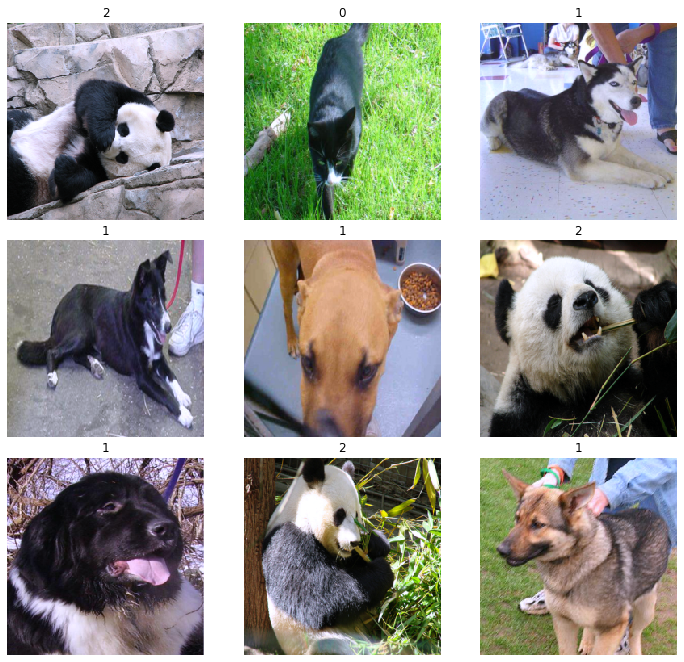

In [60]:
image_plot(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


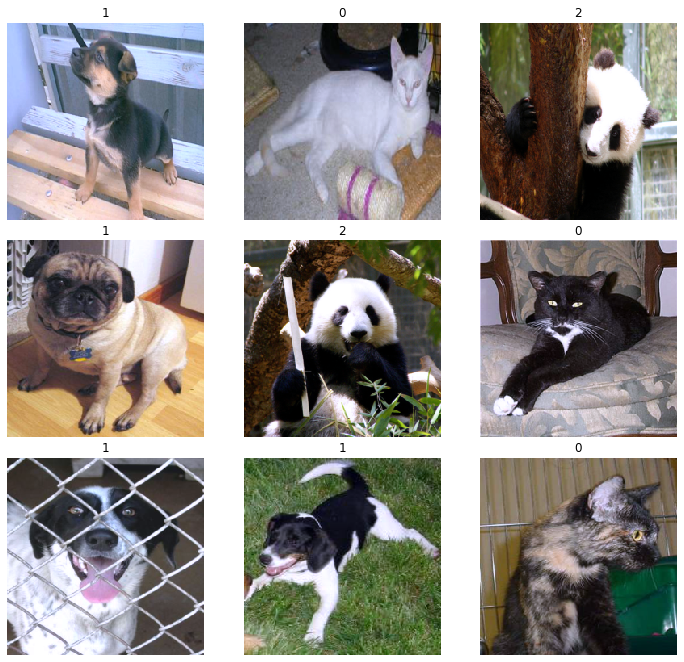

In [61]:
image_plot(val_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


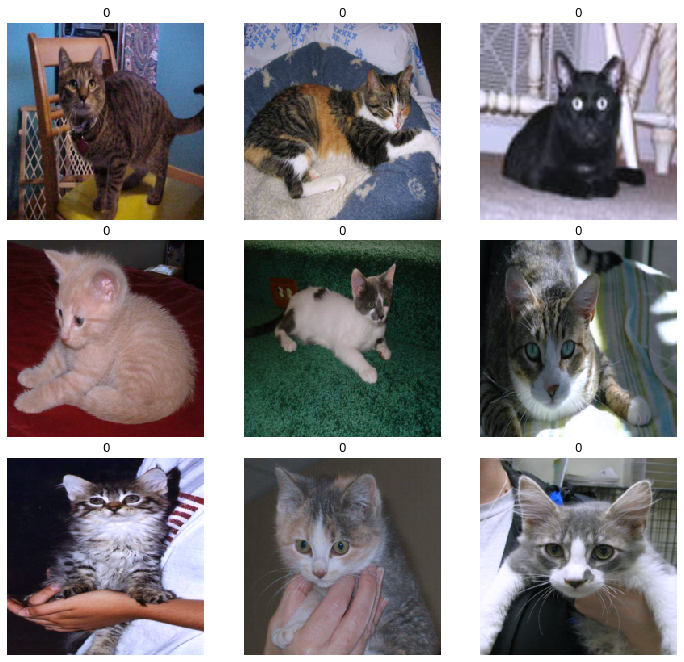

In [62]:
image_plot(test_loader)

### Create Model

In [16]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [17]:
# create model from object

In [18]:
res_model = Resnet50_pretrained(num_classes)

In [19]:
# res_model = res_model.build()

### Train Model

In [20]:
# Train Params
n_epochs = 3
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [21]:
break

SyntaxError: 'break' outside loop (<ipython-input-21-6aaf1f276005>, line 4)

In [22]:
H = train(res_model.model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

./helpers\model_helpers.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch #1, Batch #1 train_loss: 1.102831 train_acc: 0.375
Epoch #1, Batch #51 train_loss: 0.874551 train_acc: 0.756127


./helpers\model_helpers.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch: 1 val_loss: 0.591722 val_acc: 0.937500
SAVE MODEL: val_loss decrease (0.597958) val_acc: 0.940351
Epoch #2, Batch #1 train_loss: 0.568755 train_acc: 0.96875
Epoch #2, Batch #51 train_loss: 0.522359 train_acc: 0.95098
Epoch: 2 val_loss: 0.377193 val_acc: 0.968750
SAVE MODEL: val_loss decrease (0.390427) val_acc: 0.966667
Epoch #3, Batch #1 train_loss: 0.362912 train_acc: 0.96875
Epoch #3, Batch #51 train_loss: 0.376700 train_acc: 0.963848
Epoch: 3 val_loss: 0.295684 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.302888) val_acc: 0.966667


### Train Logs

In [25]:
H

{'train_loss': [0.8130330443382263, 0.5001459121704102, 0.3634782135486603],
 'train_acc': [0.8061403508771929, 0.9530701754385965, 0.9662280701754385],
 'val_loss': [0.5979578495025635, 0.39042675495147705, 0.3028879761695862],
 'val_acc': [0.9403508771929825, 0.9666666666666667, 0.9666666666666667]}

In [ ]:
plot_train_history(H,n_epochs)

### Save Model

In [ ]:
res_model.save('test_save_method2.pt')

### Load Model


In [ ]:
# TODO Create model method
res_model.load('test_save_method.pt',True)

### Test Model

In [67]:
# get images image folder
images = glob.glob("../datasets/test_animals/*")

In [68]:
for image in images:
    predict(res_model,image,device)

PermissionError: [Errno 13] Permission denied: '../datasets/test_animals\\cat'